# HTQ V2

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])

In [13]:
df = df.rename(columns={'profit': 'expected_profit'})
df[['bidamount', 'won_ping', 'expected_revenue', 'expected_profit']]

,bidamount,won_ping,expected_revenue,expected_profit
0,6.28,0.0,12.6,6.32
1,5.17,0.0,12.6,7.43
2,5.71,0.0,12.6,6.89
3,5.48,1.0,12.6,7.12
4,5.79,1.0,12.6,6.81
...,...,...,...,...
126953,7.34,0.0,12.6,5.26
126954,3.27,1.0,12.6,9.33
126955,2.94,1.0,12.6,9.66
126956,5.66,0.0,12.6,6.94


In [19]:
correlations = df.corr()['bidamount'].drop('bidamount')  # Drop the correlation of the target with itself

# Sort the correlations
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations[:100])

expected_revenue              0.449568
affiliate_id_1031             0.297274
use_type_VARIES               0.259615
commute_mileage               0.206507
marital_status_type_SINGLE    0.197455
                                ...   
use_type_COMMUTE_SCHOOL      -0.014567
DayName                      -0.015160
credit_type_POOR             -0.018653
car_owned                    -0.019050
state_NV                     -0.020984
Name: bidamount, Length: 100, dtype: float64


In [184]:
X = df.drop('won_ping', axis=1)
y = df['won_ping']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=20000)

# Train the model
model.fit(X_train, y_train)

# Make predictions

predictions = model.predict(X_test)

predict_probas = model.predict_proba(X_test)

probabilities_class_1 = probabilities[:, 1]

# Evaluate the model
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86     13610
         1.0       0.89      0.76      0.82     11782

    accuracy                           0.84     25392
   macro avg       0.85      0.84      0.84     25392
weighted avg       0.85      0.84      0.84     25392

Accuracy: 0.8448724007561437


## Test on Win probability as a function of bid amount

In [194]:
results = y_test.to_frame()
results['win_proba'] = probabilities_class_1
results['y_pred'] = predictions

In [198]:
results[(results['win_proba'] >= 0.45) & (results['win_proba'] <= 0.55) & (results['won_ping'] == 0)].head()

,won_ping,win_proba,y_pred
124374,0.0,0.464438,0.0
104238,0.0,0.484902,0.0
37796,0.0,0.503440,0.0
86169,0.0,0.503660,0.0
97220,0.0,0.511409,0.0


In [231]:
space = np.linspace(0, 15, 100)

In [232]:
X_test.loc[[60540, 40646, 7215, 29609], :]

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
60540,6,2,5.62,0.0,0.100000,0.078431,0.0,0.037736,0.0,0.0,0.166667,0.080000,1.0,0.444444,0.444444,1.0,0.000000,0.0,12.6,0.913174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.98
40646,12,1,3.37,0.0,0.104167,0.163399,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.444444,0.444444,1.0,0.000000,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.23
7215,13,4,5.76,1.0,0.050000,0.183007,0.0,0.000000,0.0,0.0,0.166667,0.222857,1.0,0.444444,0.444444,1.0,0.333333,0.0,12.6,0.898772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.84
29609,0,5,6.00,0.0,0.050000,0.392157,0.0,0.000000,0.0,0.0,0.166667,0.1

In [233]:
idx_test = 104238
idx_original_bid_value = X_test.at[idx_test, 'bidamount']

In [234]:
sample = X_test.loc[[idx_test]]
sample

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
104238,11,2,7.31,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.111111,0.091429,1.0,0.444444,0.444444,1.0,0.0,0.0,12.6,0.706219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.29


In [235]:
new_sample = sample.copy()
new_sample

,TheHour,DayName,bidamount,owns_home,months_in_residence,current_months_with_carrier,license_valid,license_obtained_age,bankruptcy,sr_22,mileage,commute_mileage,car_owned,comprehensive_deductible,collision_deductible,current_coverage,NumVehicles,NumDrivers,expected_revenue,buyerid,affiliate_id_1031,affiliate_id_1036,affiliate_id_1043,affiliate_id_2113,affiliate_id_2116,affiliate_id_2128,affiliate_id_2154,affiliate_id_2165,affiliate_id_2238,affiliate_id_2251,affiliate_id_2254,affiliate_id_2257,affiliate_id_2258,affiliate_id_2259,affiliate_id_2261,affiliate_id_2262,affiliate_id_2263,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,credit_type_FAIR,credit_type_GOOD,credit_type_POOR,gender_type_MALE,gender_type_NONBINARY,marital_status_type_MARRIED,marital_status_type_SEPARATED,marital_status_type_SINGLE,marital_status_type_WIDOWED,relationship_type_SELF,relationship_type_SPOUSE,occupation_CLERGY,occupation_CLERICAL,occupation_CONSTRUCTION_TRADE_LABORER,occupation_DISABLED,occupation_DOCTOR_DENTIST,occupation_EDUCATION_TRAINING,occupation_ENGINEER_SCIENTIST,occupation_HOMEMAKER,occupation_LAWYER_JUDGE,occupation_MILITARY_OTHER,occupation_OTHER,occupation_PRODUCTION_MANUFACTURING,occupation_RETAIL_SALES,occupation_RETIRED,occupation_SALES_OUTSIDE,occupation_SELF_EMPLOYED_BUSINESS_OWNER,occupation_SKILLED_WORKER,occupation_STUDENT_NOT_LIVING_W_PARENTS,occupation_UNEMPLOYED,education_level_BACHELORS_DEGREE,education_level_DOCTORATE_DEGREE,education_level_HIGH_SCHOOL_DIPLOMA,education_level_MASTERS_DEGREE,education_level_OTHER,education_level_SOME_COLLEGE,education_level_SOME_OR_NO_HIGH_SCHOOL,military_experience_OTHER,use_type_COMMUTE_SCHOOL,use_type_COMMUTE_WORK,use_type_PLEASURE,use_type_VARIES,coverage_type_MINIMUM,coverage_type_STANDARD,coverage_type_SUPERIOR,expected_profit
104238,11,2,7.31,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.111111,0.091429,1.0,0.444444,0.444444,1.0,0.0,0.0,12.6,0.706219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.29


In [236]:
res = []
for new_bid in space:
    new_sample.at[idx_test, 'bidamount'] = new_bid
    new_sample.at[idx_test, 'expected_profit'] = new_sample.at[idx_test, 'expected_revenue'] - new_bid
    profit = new_sample.at[idx_test, 'expected_revenue'] - new_bid
    proba = model.predict_proba(new_sample)[:, 1][0]
    res.append((profit, proba))

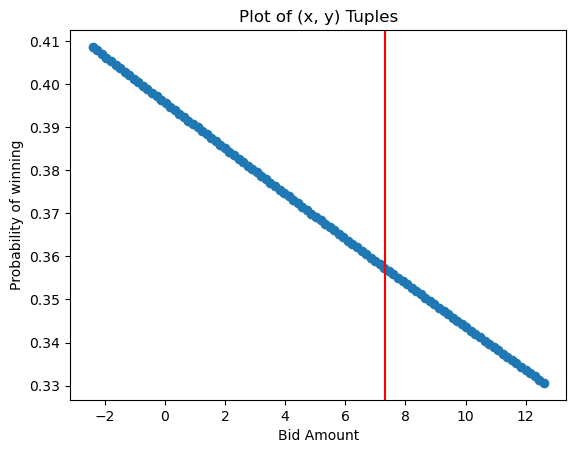

In [237]:
x, y = zip(*res)

# Create a scatter plot
plt.scatter(x, y)

# Optionally, you can also plot lines between the points
plt.plot(x, y)

# Adding titles and labels (optional)
plt.title("Plot of (x, y) Tuples")
plt.xlabel("Bid Amount")
plt.ylabel("Probability of winning")
plt.axvline(idx_original_bid_value, color='red')

# Show the plot
plt.show()

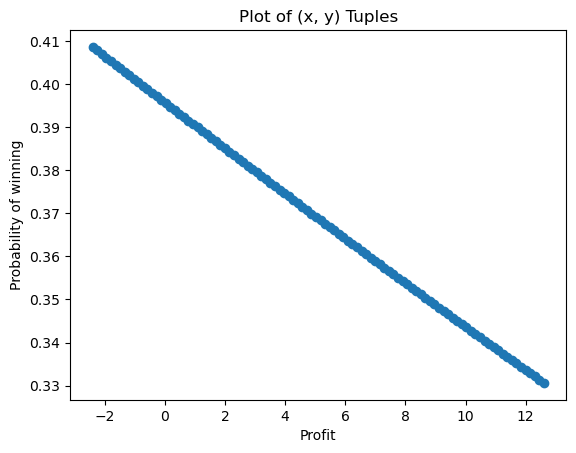

In [238]:
x, y = zip(*res)

# Create a scatter plot
plt.scatter(x, y)

# Optionally, you can also plot lines between the points
plt.plot(x, y)

# Adding titles and labels (optional)
plt.title("Plot of (x, y) Tuples")
plt.xlabel("Profit")
plt.ylabel("Probability of winning")
# Show the plot
plt.show()

<Axes: xlabel='bidamount', ylabel='expected_profit'>

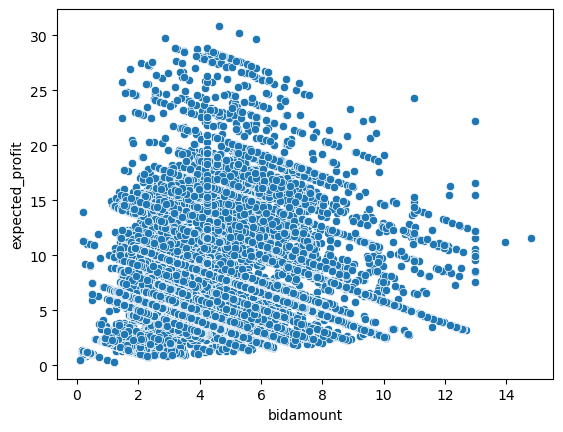

In [240]:
sns.scatterplot(x='bidamount', y='expected_profit', data=df)